In [1]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
import os
from utilities import *

PyDIPjavaio unavailable:
DLL load failed while importing PyDIPjavaio: The specified module could not be found.

libjvm not found
DIPlib -- a quantitative image analysis library
Version 3.2.0 (Feb  8 2022)
For more information see https://diplib.org


In [2]:
# dip_blue, blue_names = load_dip_images('blues')
# # dip_gray, grays_names = load_dip_images('gray')
# dip_blue[21].Show()

In [2]:
# create blu and gray images from data
dip_images, dip_names = load_dip_images('data')

dip_gray, dip_blue = make_grayscale(dip_images)
save_images(dip_gray, 'gray', "gray", file_type=["tif"])
save_images(dip_blue, 'blues', "blue", file_type=["tif"])

dip_gray[21].Show()

: 

: 

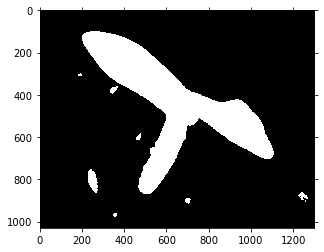

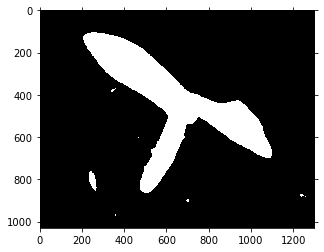

In [ ]:
# threshold and morphological operators
dip_thresh = threshold_images(dip_blue)
save_images(dip_thresh, 'thresh', "thresh", file_type=["tif"])
dip_transf = apply_transformations(dip_thresh)
save_images(dip_transf, 'transf', "transf", file_type=["tif"])

dip_thresh[21].Show()
dip_transf[21].Show()

In [ ]:
features = ['Perimeter', 'Size',
                'Circularity','Roundness',
                'Statistics']
                
dip_labeled, measurements = measure_elements(dip_transf, dip_gray, features=features)

NameError: name 'dip_gray' is not defined

In [ ]:
measurements

[<Measurement with 6 features for 10 objects>,
 <Measurement with 6 features for 5 objects>,
 <Measurement with 6 features for 6 objects>,
 <Measurement with 6 features for 3 objects>,
 <Measurement with 6 features for 6 objects>,
 <Measurement with 6 features for 2 objects>,
 <Measurement with 6 features for 4 objects>,
 <Measurement with 6 features for 1 objects>,
 <Measurement with 6 features for 14 objects>,
 <Measurement with 6 features for 5 objects>,
 <Measurement with 6 features for 6 objects>,
 <Measurement with 6 features for 4 objects>,
 <Measurement with 6 features for 14 objects>,
 <Measurement with 6 features for 10 objects>,
 <Measurement with 6 features for 6 objects>,
 <Measurement with 6 features for 3 objects>,
 <Measurement with 6 features for 6 objects>,
 <Measurement with 6 features for 2 objects>,
 <Measurement with 6 features for 5 objects>,
 <Measurement with 6 features for 2 objects>,
 <Measurement with 6 features for 7 objects>,
 <Measurement with 6 features 

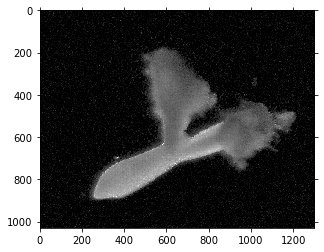

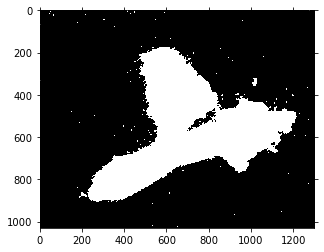

In [ ]:
img = dip_images[0]
arr = np.array(img)
aa = arr[:,:,2]
blue = dip.Image(aa)
blue.Show()
blue = dip.Gauss(blue, sigmas=[2])
thresh= dip.TriangleThreshold(blue)

open = dip.Opening(thresh)


thresh.Show()

In [ ]:
arr

array([[[100, 152,   0],
        [168, 104,   0],
        [232, 112,   0],
        ...,
        [132, 188, 100],
        [224,  20, 156],
        [100, 192,  56]],

       [[100, 152,   0],
        [100, 152,   0],
        [232, 112,   0],
        ...,
        [128,  12, 232],
        [208,  96, 176],
        [208,  96, 176]],

       [[216,  52,   0],
        [138, 211,   0],
        [134,  47, 131],
        ...,
        [248,  45, 215],
        [ 26, 223,   0],
        [  0, 148, 128]],

       ...,

       [[216,  52,   0],
        [133, 198, 172],
        [100,   0,   0],
        ...,
        [225,   9, 149],
        [184, 173, 182],
        [  0, 148, 128]],

       [[216,  52,   0],
        [188,   2, 246],
        [ 94, 192, 175],
        ...,
        [241,  84,  59],
        [ 73, 102,  13],
        [  0, 148, 128]],

       [[156, 132,   0],
        [112,   8,   0],
        [  8, 188,   0],
        ...,
        [ 40, 232,  36],
        [  0, 104, 156],
        [  0, 148, 128]]

In [ ]:
np.array(blue)

array([[ 9516.287 ,  9454.527 ,  9265.628 , ...,  9005.6045,  8714.999 ,
         8595.168 ],
       [ 9510.223 ,  9455.244 ,  9282.318 , ...,  9096.923 ,  8792.127 ,
         8663.414 ],
       [ 9463.508 ,  9425.786 ,  9295.339 , ...,  9307.506 ,  8973.677 ,
         8826.047 ],
       ...,
       [10588.578 , 10576.62  , 10538.12  , ...,  8490.211 ,  7609.996 ,
         7250.043 ],
       [10748.587 , 10733.733 , 10679.888 , ...,  8483.864 ,  7536.695 ,
         7152.065 ],
       [10806.77  , 10790.945 , 10731.307 , ...,  8457.918 ,  7478.6875,
         7082.302 ]], dtype=float32)

In [ ]:
np.where(aa ==0)

(array([   0,    0,    0, ..., 1029, 1029, 1029], dtype=int64),
 array([ 560,  561, 1242, ..., 1275, 1298, 1299], dtype=int64))

In [ ]:
np.array(dip_images[:,;,2])

SyntaxError: invalid syntax (Temp/ipykernel_23012/2461057589.py, line 1)

In [ ]:
blues=[]
grays = []
for img in dip_images:
    array= np.array(img)
    new_img = dip.ColorSpaceManager.Convert(img, "gray")
    blue_img = dip.Image(array[:,:,2])
    blues.append(blue_img)
    grays.append(new_img)